# Missing Value Handling

[Himanshu Goswami](https://github.com/HimGos) - September 2022

Missing values in a dataset can be a hornet’s nest for any data scientist. Variables with missing values can be a non-trivial problem as there is no easy way out to deal with them.

Generally, if the proportion of missing observations in data is small relative to the total number of observations, we can simply remove those observations. However, this is not the most often case. Deleting the rows containing missing values may lead to parting away with useful information or patterns.

Python libraries represent missing numbers as nan which is short for "not a number". We can detect which cells have missing values, and then count how many there are in each column with the command:
`df.isnull().sum()`

There are various strategies to handle missing values, some of them are :-
- Drop the row
- Random Filling
- Forward Filling
- Backward filling
- Stats Approach - Mean, Median, Mode
- Knn Imputer
- End of distribution
- ML Algo which support missing value
- Custom ML Model (self-made)

Let's see some of these strategies in action!

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset

df = pd.read_csv('data/Travel.csv')

In [3]:
# Checking Data

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [5]:
# Checking how many missing values data has

df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

***We can see some rows has upto 251 missing values.***

In [6]:
# Before we start using strategies, let's create a copy of our dataset first so that we don't have to reload data for next strategies

df_orig = df.copy()


> ## Method 1 :- Drop the Row

- This method is not recommended especially when we have a large dataset with many missing values.
- Dropping many rows will result in loss of information and may give undesired results.

In [7]:
# Checking current shape of data

df.shape

(4888, 20)

In [8]:
# We can see all the rows which has atleast 1 null value

df[df.isnull().any(axis=1)].head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0


In [9]:
any_null_df = df[df.isnull().any(axis=1)]

In [10]:
# Checking shape of this dataset which has even a single null value in entire row

any_null_df.shape

(760, 20)

In [11]:
# Removing all null values from dataset

df.dropna(axis=0, how='any').head()                   # use parameter inplace=True for permanent change

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


 - The above dataset has not even a single null value now but it came at the cost of **losing information**.
 - We lost 760 rows even if in whole row only 1 value was NaN.

> ## Method 2 :- Random Filling

- Random filling is an interesting technique which allows us to fill our NaN values with ANY random value (we have categorized).
- We can use random library here which allows us to fill random integer & float of decided range OR we can also pick a random value from the series which missing value belongs to, to replace missing value

In [12]:
# Checking for missing values first

df[df.isnull().any(axis=1)].head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0


In [13]:
# In above dataframe we can see NaN values in Age column. Let's fix it first

df['Age'].fillna(value=random.choice(df[df['Age'] != np.nan]['Age']), inplace =True)

In [14]:
# Checking if Age column is left with any null value now

df['Age'].isnull().sum()

0

In [15]:
# Checking what kind of values took place in Age NaN values

df['Age'].head()

0    41.0
1    49.0
2    37.0
3    33.0
4    31.0
Name: Age, dtype: float64

> We can see 4th row was NaN earlier and now filled with random value of 61 from Age series.

In [16]:
# Performing similar strategy over all columns

for i in df.columns:
    df[i].fillna(value=random.choice(df[df[i] != np.nan][i]), inplace =True)

In [17]:
df.isnull().sum().head()

CustomerID       0
ProdTaken        0
Age              0
TypeofContact    0
CityTier         0
dtype: int64

> ***Not even a single column is left with Missing Value now. All are replaced by random values from their own series.***

In [18]:
# Getting our previous data back for next methods

df = df_orig

> #### Observation :-
> - Random filling has filled all NaN values with the random value within the series those NaN values belong to.
> - Eg. Age column had NaN values which got filled by any random value from Age column only

> ## Method 3 :- Forward Filling

- There are two ways of doing this kind of filling.
    - Either used fillna function with method parameter `df.fillna(method=ffill)`
    - OR use ffill() function
- `df.ffill()` function is used to for forward filling and it propagates last valid observation forward.

- When ffill() is applied across the index then any missing value is filled based on the corresponding value in the previous row.

In [19]:
# Finding missing values

df[df.isnull().any(axis=1)].head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0


> In above dataset we can see Age column has missing values in 4,11 and 19th row

In [20]:
df['Age'].iloc[[4,11,19]]

4    NaN
11   NaN
19   NaN
Name: Age, dtype: float64

In [21]:
# Forward filling Age column

df['Age'].ffill(axis=0).iloc[3:12]

3     33.0
4     33.0
5     32.0
6     59.0
7     30.0
8     38.0
9     36.0
10    35.0
11    35.0
Name: Age, dtype: float64

> #### Observation :-
> - We can see column no. 4 and 11 were NaN earlier and now they got filled by values in row upper than them.
> - Row 4th took the value of 3rd.
> - Row 11th took the value of 10th.
> - If first row value was missing then Forward Filling won't help us. We need to use the concept of Backward Filling there.

> ## Method 4 :- Backward Filling

- There are two ways of doing this kind of filling.
    - Either used fillna function with method parameter `df.fillna(method=bfill)`
    - OR use bfill() function
- `df.bfill()` function is used to for backward filling. It will backward fill the NaN values that are present in the pandas dataframe.


In [22]:
# Finding missing values

df[df.isnull().any(axis=1)].head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0


> In above dataset we can see Age column has missing values in 4,11 and 19th row

In [23]:
df['Age'].iloc[[4,11,19]]

4    NaN
11   NaN
19   NaN
Name: Age, dtype: float64

In [24]:
# Backward filling Age column

df['Age'].bfill(axis=0).iloc[4:13]

4     32.0
5     32.0
6     59.0
7     30.0
8     38.0
9     36.0
10    35.0
11    31.0
12    31.0
Name: Age, dtype: float64

> #### Observation :-
> - We can see column no. 4 and 11 were NaN earlier and now they got filled by values in row lower than them.
> - Row 4th took the value of 5th.
> - Row 11th took the value of 12th.
> - If last row value was missing then Backward Filling won't help us. We need to use the concept of Foward Filling there.

> ## Method 5 :- Stats Approach

- Stats approach is an effective way of dealing with missing values.
- We have 3 options to replace the missing values with :-
    - **Mean** is a good way of replacing but it is sensitive to outliers that's why it's not preferable.
    - **Median** is perfect if you are working with numerical variables.
    - **Mode** is the best option if we are working with categorical variables.

> ### Mean

In [25]:
# Finding null values

df[df.isnull().any(axis=1)].head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0


> Let's pick Monthly Income column (last one) to fill NaN with Mean value

In [26]:
# Picking some rows for reference

df['MonthlyIncome'].iloc[[1,11,19,20,21]]

1     20130.0
11        NaN
19        NaN
20        NaN
21    18407.0
Name: MonthlyIncome, dtype: float64

In [27]:
# Finding mean value of Monthly Income column

df['MonthlyIncome'].mean()

23619.85349087003

In [28]:
# Assigning mean value to a variable

Mean = df['MonthlyIncome'].mean()

In [29]:
# Using fillna() function to fill NaN values with Mean value

df['MonthlyIncome'].fillna(value=Mean).iloc[[1,11,19,20,21]]

1     20130.000000
11    23619.853491
19    23619.853491
20    23619.853491
21    18407.000000
Name: MonthlyIncome, dtype: float64

> #### Observation :-
> - NaN values has been filled with mean value of Monthly Income column.
> - Not to forget, mean is sensitive to outliers so figure may not be accurate to use for optimum result.

> ### Median

In [30]:
# Picking some rows from 'Monthly Income' column for reference

df['MonthlyIncome'].iloc[[1,11,19,20,21]]

1     20130.0
11        NaN
19        NaN
20        NaN
21    18407.0
Name: MonthlyIncome, dtype: float64

In [31]:
# Finding median value of Monthly Income column

df['MonthlyIncome'].median()

22347.0

In [32]:
# Assigning median to a variable

Median = df['MonthlyIncome'].median()

In [33]:
# Using fillna() function to fill NaN values with Median value

df['MonthlyIncome'].fillna(value=Median).iloc[[1,11,19,20,21]]

1     20130.0
11    22347.0
19    22347.0
20    22347.0
21    18407.0
Name: MonthlyIncome, dtype: float64

> #### Observation :-
> - NaN values has been filled with median value of Monthly Income column.
> - We can see median value is lesser than mean value that means mean value is being pulled up by some outliers.

> ### Mode

- For Mode we will use a categorical variable

In [34]:
# Segregating categorical variables from numerical.

df[df.select_dtypes(exclude=np.number).isnull().any(axis=1)].head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
224,200224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,200571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,200572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,200576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,200579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN


> Taking 'Type Of Contact' column for our experiment. Row number 571,572,576 are NaN values.

In [35]:
# Picking NaN rows of 'Type of Contact' column

df['TypeofContact'].iloc[571:577]

571             NaN
572             NaN
573    Self Enquiry
574    Self Enquiry
575    Self Enquiry
576             NaN
Name: TypeofContact, dtype: object

In [36]:
# Finding mode value of Type of Contact column

df['TypeofContact'].mode()

0    Self Enquiry
Name: TypeofContact, dtype: object

In [37]:
# Assigning it to a variable

Mode = df['TypeofContact'].mode()[0]

In [38]:
# Using fillna() function to fill NaN values with Mode value

df['TypeofContact'].fillna(value=Mode).iloc[571:577]

571    Self Enquiry
572    Self Enquiry
573    Self Enquiry
574    Self Enquiry
575    Self Enquiry
576    Self Enquiry
Name: TypeofContact, dtype: object

> #### Observation :-
> - NaN values has been filled with mode value of Type of Contact column.
> - Mode is one of the best method to fill categorical columns NaN values.

> ## Method 6 :- KNN Imputer

> - **Impute** means to "frame as" or "attribute".
> - Imputation is seen as a way to avoid pitfalls involved with listwise deletion of cases that have missing values.
> - k-nearest neighbor (KNN)
> - KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.
> - KNNImputer works only for Numerical data.

In [39]:
# Retrieving original dataset

df = df_orig

In [40]:
# Picking dataset where we have NaN values in AGE & Monthly Income Columns

df.iloc[17:23].select_dtypes(include=np.number)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
17,200017,0,22.0,1,22.0,3,2.0,3.0,2.0,1,3,0,0.0,17935.0
18,200018,0,53.0,3,8.0,3,4.0,3.0,3.0,0,3,1,0.0,30427.0
19,200019,0,NaN,1,8.0,2,3.0,3.0,6.0,1,4,0,1.0,NaN
20,200020,0,NaN,1,17.0,3,2.0,3.0,1.0,0,3,1,2.0,NaN
21,200021,1,NaN,3,15.0,2,4.0,5.0,1.0,0,2,0,0.0,18407.0
22,200022,0,34.0,1,13.0,2,3.0,4.0,1.0,0,3,1,0.0,26994.0


In [41]:
nan_df = df.iloc[17:23].select_dtypes(include=np.number)

In [42]:
imputer = KNNImputer(n_neighbors=2)
After_imputation = imputer.fit_transform(nan_df)

After_imputation

array([[2.00017e+05, 0.00000e+00, 2.20000e+01, 1.00000e+00, 2.20000e+01,
        3.00000e+00, 2.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 1.79350e+04],
       [2.00018e+05, 0.00000e+00, 5.30000e+01, 3.00000e+00, 8.00000e+00,
        3.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00, 0.00000e+00,
        3.00000e+00, 1.00000e+00, 0.00000e+00, 3.04270e+04],
       [2.00019e+05, 0.00000e+00, 4.35000e+01, 1.00000e+00, 8.00000e+00,
        2.00000e+00, 3.00000e+00, 3.00000e+00, 6.00000e+00, 1.00000e+00,
        4.00000e+00, 0.00000e+00, 1.00000e+00, 2.87105e+04],
       [2.00020e+05, 0.00000e+00, 2.80000e+01, 1.00000e+00, 1.70000e+01,
        3.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00,
        3.00000e+00, 1.00000e+00, 2.00000e+00, 2.27005e+04],
       [2.00021e+05, 1.00000e+00, 2.80000e+01, 3.00000e+00, 1.50000e+01,
        2.00000e+00, 4.00000e+00, 5.00000e+00, 1.00000e+00, 0.00000e+00,
        2.00000e+00, 0.000

> #### Observation :-
> - Age & Monthly Income NaN values got replaced by means of nearest 2 neighbors in those series.
> - After transforming the data becomes a numpy array.
> - The missing value is predicted in reference to the mean of the neighbours.

> ## Method 7 :- End of Distribution Imputation

> - In this method we replace missing values with far end values or extreme.
> - Far end value means the values after 3rd stander deviation.

![Distribution Pic](https://www.isixsigma.com/wp-content/uploads/2018/11/Screen-Shot-2022-06-13-at-10.20.58-AM.png)

In [43]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

> #### Picking Monthly income as our column for experiment

In [44]:
# Picking some rows from 'Monthly Income' column for reference

df['MonthlyIncome'].iloc[[1, 11, 19, 20, 21]]

1     20130.0
11        NaN
19        NaN
20        NaN
21    18407.0
Name: MonthlyIncome, dtype: float64

In [45]:
# Finding mean of Monthly income feature

mean = df['MonthlyIncome'].mean()
mean

23619.85349087003

In [46]:
# Finding Stander deviation of Monthly Income feature

std = df['MonthlyIncome'].std()
std

5380.698360691634

- Now we have a mean and stander deviation of Age feature now we find the Far end values or extreme value
- where extreme values means the values after 3rd stander deviation
- so extreme = (Mean of Age Feature + ( 3 * stander deviation of Age Feature))

In [47]:
# Finding Extreme value

extreme = (mean + (3*std) )

extreme

39761.94857294494

> Plotting a graph for better understanding

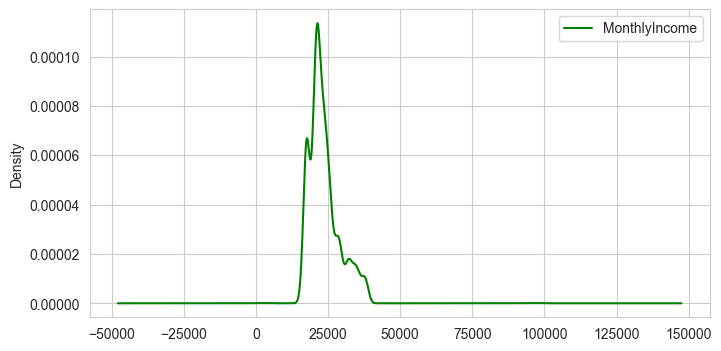

In [48]:
plt.figure(figsize=(8,4))
df['MonthlyIncome'].plot(kind='kde', color='g')
plt.legend()
plt.show();

<AxesSubplot:>

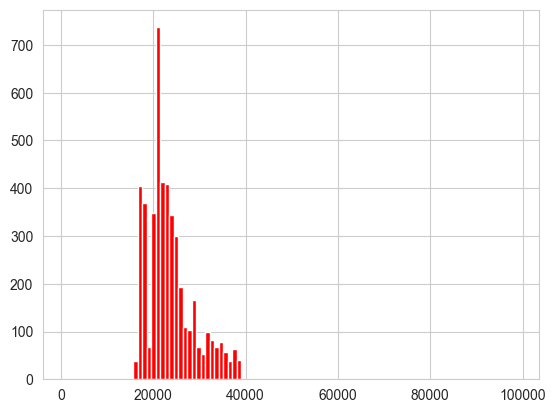

In [61]:
df['MonthlyIncome'].hist(bins=100, color='r')

<AxesSubplot:xlabel='MonthlyIncome'>

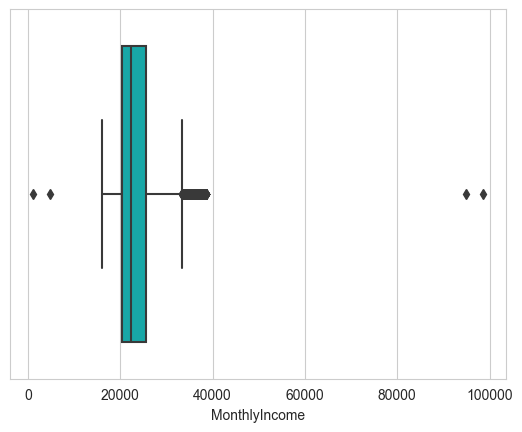

In [50]:
sns.boxplot(df['MonthlyIncome'], color='c')

- In above graphs we can see the outliers. Will act as our extreme value for imputation.

In [51]:
# Creating a function to replace missing in Any column with extreme values

def end_distribution(df,variable,extreme):

    df[variable+'_median'] = df[variable].fillna(df[variable].median())
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)

In [52]:
end_distribution(df, 'MonthlyIncome', extreme)

In [53]:
# Checking our Monthly Income column along with 2 new columns to make picture clear.

df[['MonthlyIncome', 'MonthlyIncome_median', 'MonthlyIncome_end_distribution']].iloc[[1, 11, 19, 20, 21]]

,MonthlyIncome,MonthlyIncome_median,MonthlyIncome_end_distribution
1,20130.0,20130.0,20130.000000
11,NaN,22347.0,39761.948573
19,NaN,22347.0,39761.948573
20,NaN,22347.0,39761.948573
21,18407.0,18407.0,18407.000000


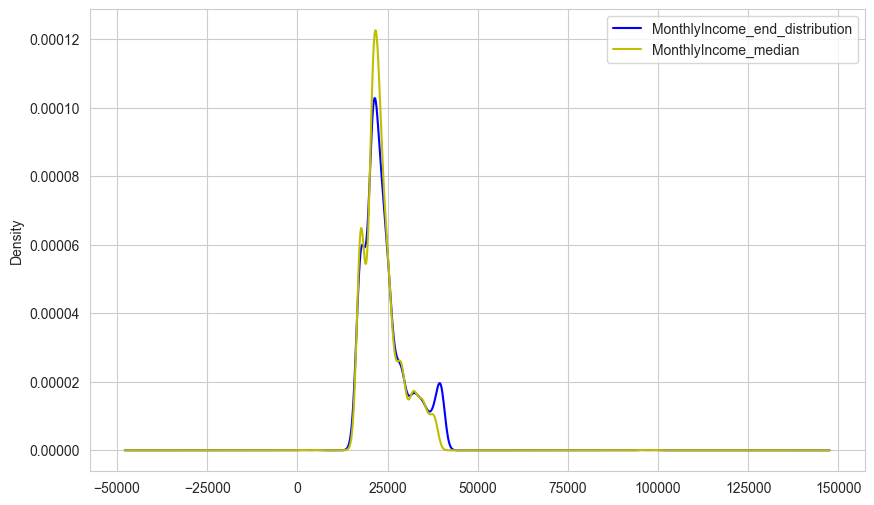

In [54]:
plt.figure(figsize=(10,6))
df['MonthlyIncome_end_distribution'].plot(kind='kde',color='b')
df['MonthlyIncome_median'].plot(kind='kde',color='y')
plt.legend()
plt.show();

> Now we can see that
> - when we replace NaN with median then it show distortion
> - but it overcome when we replace NaN with End of Distribution.
> - EoD also shifts our Lower and higher fences to outer side, reducing the number of outliers.

------------------------------------------------------------------------------